#Data collection and Sentiment Analysis of British Airways Reviews







#Objectives:
In this project I will be focused on extracting data from a third-party source and classify customer reviews of British Airways into three categories—positive, negative, or neutral—using polarity and sentiment analysis. This would provide insights into customer satisfaction and areas for improvement.



#Scraping Data:

I will be using a library called `BeautifulSoup` to collect and scape the data from the web. I will be scaping the reviews from airlinequality.com. Once this data is collected, it is saved into a local `.csv` file.

Here are the urls I will be using to scrape the data:  
 [https://www.airlinequality.com]
 [https://www.airlinequality.com/airline-reviews/british-airways]


Now for this task we are only interested in reviews related to British Airways and the Airline itself.


In [ ]:
#importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #how many pages are scraped
page_size = 100 #setting the limit of pages that can be scraped

reviews = []


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
#we are loading the scaped data
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Although we had mobile boa...
1,✅ Trip Verified | Booking through the Britis...
2,✅ Trip Verified | Abysmal experience with fli...
3,✅ Trip Verified | Check in at Miami was quick...
4,✅ Trip Verified | Our BA Airbus 380 premium e...


Next I Saved the dataset as a csv file.

In [ ]:
#save original data to csv file
df=pd.DataFrame()
df["reviews"] = reviews
df.to_csv('BA_reviews.csv', index = False)

The loops above in code block [2] collected 1000 reviews by iterating through the paginated pages on the website.Now the next thing that I did is clean the data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning and Processing:


In [ ]:

df = pd.read_csv('BA_reviews.csv')
#Inspect data by reloading it
print(df.head())
#df.info method provides a concise summary of the DataFrame.Displays index,coumn info,and memory usage.
print(df.info())
#performs decriptive statisitcs of the dataset
print(df.describe())

#checking if any rows contain null values
print(df.isnull().sum)

                                             reviews
0  ✅ Trip Verified |   Although we had mobile boa...
1  ✅ Trip Verified |   Booking through the Britis...
2  ✅ Trip Verified |  Abysmal experience with fli...
3  ✅ Trip Verified |  Check in at Miami was quick...
4  ✅ Trip Verified |  Our BA Airbus 380 premium e...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None
                                                  reviews
count                                                1000
unique                                               1000
top     Not Verified |  Calgary to Gothenburg via Lond...
freq                                                    1
<bound method DataFrame.sum of      reviews
0      False
1      False
2      False
3      False
4      False
..       ...
995    Fa

In [ ]:
#removing Trip verified,Not verified, its associated characters
df['reviews'] = df['reviews'].str.replace('Trip Verified', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified', '', regex=False)
df['reviews'] = df['reviews'].str.replace('|', '', regex=False)
df['reviews'] = df['reviews'].str.replace('✅ ', '', regex=False)

In [ ]:
# this is the BA_reviews_removedtripverifed.csv file.Displays dataframe after verified info and special characters are removed
print("\nUpdated DataFrame:")
display(df)
#df.to_csv('BA_reviews_removedtripverifed.csv', index = False)



Updated DataFrame:


,reviews
0,Although we had mobile boarding passes and...
1,Booking through the British Airways websit...
2,Abysmal experience with flight initially de...
3,Check in at Miami was quick and easy. Ameri...
4,Our BA Airbus 380 premium economy section h...
...,...
995,Istanbul to New York via London. Literally t...
996,Yesterday my husband and I decided to to co...
997,Flight from London to Athens with British Ai...
998,Short 45 minute flight north and south with...


In [ ]:
import re
import nltk

#intalling necessary data processing libraries
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Preprocessing function
def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)

    # 3. Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # 4. Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # 5. Join the processed words back into a single string
    return " ".join(words)

# Apply preprocessing to the DataFrame
df["cleaned_review"] = df["reviews"].apply(preprocess_text)

# Display the cleaned reviews
print("Original Reviews:") #BA_reviews_removedtripverified.csv file
print(df["reviews"].head())
print("\nPreprocessed Reviews:")
print(df["cleaned_review"].head())

display(df["cleaned_review"])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Original Reviews:
0        Although we had mobile boarding passes and...
1        Booking through the British Airways websit...
2       Abysmal experience with flight initially de...
3       Check in at Miami was quick and easy. Ameri...
4       Our BA Airbus 380 premium economy section h...
Name: reviews, dtype: object

Preprocessed Reviews:
0    although mobile boarding pass checked luggage ...
1    booking british airway website straightforward...
2    abysmal experience flight initially delayed ca...
3    check miami quick easy american airline lounge...
4    ba airbus premium economy section outdatedlook...
Name: cleaned_review, dtype: object


,cleaned_review
0,although mobile boarding pass checked luggage ...
1,booking british airway website straightforward...
2,abysmal experience flight initially delayed ca...
3,check miami quick easy american airline lounge...
4,ba airbus premium economy section outdatedlook...
...,...
995,istanbul new york via london literally worst e...
996,yesterday husband decided come home rome earli...
997,flight london athens british airway one worst ...
998,short minute flight north south british airway...


# Analysis and Model:

In [ ]:
#performing Polarity Analysis or Sentiment Analysis
from textblob import TextBlob

#Sentiment_reviews is the Preprocessed Reviews
Sentiment_reviews = df["cleaned_review"]

sentiments = []
polarities = []

# Perform polarity analysis
for review in Sentiment_reviews:
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    polarities.append(polarity)

    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    sentiments.append(sentiment)

#create new dataframe
result_df = pd.DataFrame({
    "Review": Sentiment_reviews,
    "Sentiment": sentiments,
    "Polarity": polarities
})

#displays the first 5 rows
print(result_df.head())
display(result_df.head())


                                              Review Sentiment  Polarity
0  although mobile boarding pass checked luggage ...  Negative -0.325000
1  booking british airway website straightforward...  Positive  0.238690
2  abysmal experience flight initially delayed ca...  Negative -0.017593
3  check miami quick easy american airline lounge...  Positive  0.103070
4  ba airbus premium economy section outdatedlook...  Positive  0.105990


,Review,Sentiment,Polarity
0,although mobile boarding pass checked luggage ...,Negative,-0.325000
1,booking british airway website straightforward...,Positive,0.238690
2,abysmal experience flight initially delayed ca...,Negative,-0.017593
3,check miami quick easy american airline lounge...,Positive,0.103070
4,ba airbus premium economy section outdatedlook...,Positive,0.105990


#Visualization and Insights:

In [ ]:

#CSV File
result_df.to_csv("sentiment_analysis_results.csv", index=False)


Sentiment Distribution:

shows how many reviews fall into each sentiment category.
Based on this distribution plot below, around 614 out of 1000 reviews seem to be positive,370 seem to be negative and around 16 seem to be neutral. Now overall this tells us that more customers had a good experience flying with British Airways compared to those who did not have a good experience.

(Note : this information is displayed in the PowerBI dashboard)

/tmp/ipython-input-14-4062066536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=result_df, palette="pastel")


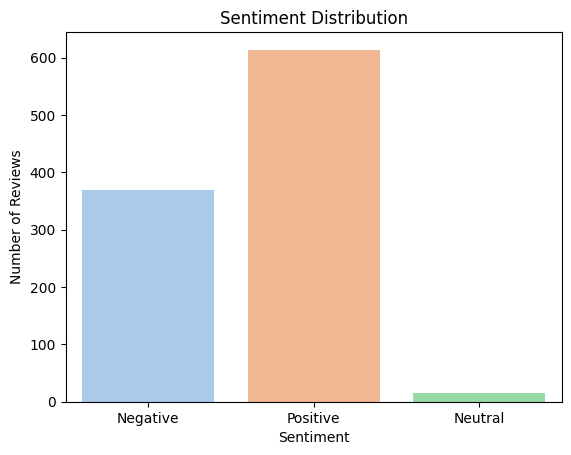

In [ ]:
import seaborn as sns

sns.countplot(x="Sentiment", data=result_df, palette="pastel")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


Sentiment Polarity Scatter Plot:

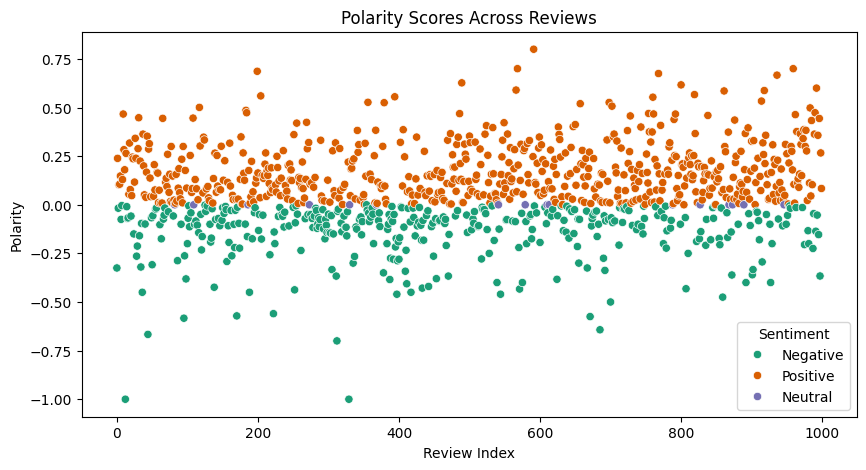

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=result_df, x=range(len(result_df)), y="Polarity", hue="Sentiment", palette="Dark2")
plt.title("Polarity Scores Across Reviews")
plt.xlabel("Review Index")
plt.ylabel("Polarity")
plt.show()

This Scatter plot plots polarity scores across indiviudal reviews, with sentiment categories represented with colors.

This plot helps spot clusters or anomalies visually. With this, several trends and insights can be drawn.

Polarity intensity:

- The y-axis shows the polarity scores, which range   from -1(strongly negative) to 1(strongly positive)


- Majority of the data points are clustered between -0.3 to 0.3. This means that many reviews are closer to neutral than positive or negative, which means the majority of reviews express mild opinions rather than extreme praise or criticism.



- Outliers towards +1 or -1, suggest that these points may need to be further looked at when it comes to customer suppot analysis or excecutive summaries.

- Any neutral-labeled dots floating far from zero might hint at misclassifications or inconsistencies in textual tone vs polarity.In the case of this plot, it does not seem like there are any misclassifications.


(Note : this information is displayed in the PowerBI dashboard)


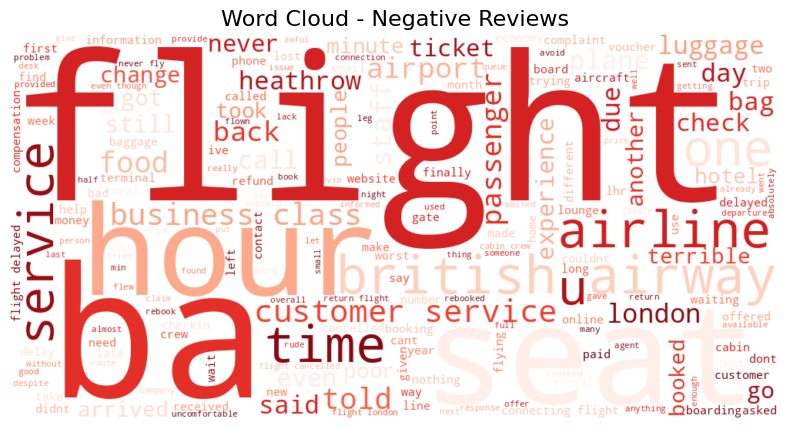

In [ ]:
from wordcloud import WordCloud

negative_reviews = result_df[result_df["Sentiment"] == "Negative"]["Review"]
negative_text = " ".join(negative_reviews.astype(str))

# Creating the word cloud for negative sentiment
wordcloud_negative = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='Reds',  # Red tones to visually suggest negativity
    max_words=200
).generate(negative_text)


# Display the plot
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Reviews", fontsize=16)
plt.show()


In [ ]:
from collections import Counter
import pandas as pd

word_list = negative_text.split()
word_freq = Counter(word_list)
freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
freq_df.to_csv("negative_word_frequency.csv", index=False)
# this displays the freq_df dataframe(this is also the negative_word_frequency.csv file)
display(freq_df)

,Word,Frequency
0,although,15
1,mobile,3
2,boarding,85
3,pass,9
4,checked,30
...,...,...
4022,shattered,1
4023,hiring,1
4024,scratch,1
4025,slim,1


Some insights that can be gathered from this wordcloud and negative frequency table are as follows.

Pain Points:

large words let me know they have a high frequency.- If terms like "delay", "rude", "refund", or "broken" appear prominently, that signals widespread dissatisfaction in those areas.


Clusters of words like "support", "agent", "call" or "crash", "bug", "slow" point to where issues lie.

So words like seat, service, airline, british, customer, flight, time and hour seem to be dominating. this could suggest several things.

"Seat" : suggests that there could be issues with Comfort, broken seats, poor layout, or unfair upgrades.

“service” / “customer”: can suggests that british airways might need to look into customer service interaction issues such as poor staff interaction or limited staff support.

“airline”: can suggest a general dissatisfaction of the airline. This may commonly involved with the airline's reputation. This mean this can involve issues in customer service interaction,seating issues or time managment issues.


“time” / “hour”: these words can suggest issues with time managment. For instance, flight delays, long waits, or poor communication.


(Note : the visualizations are displayed in the PowerBI dashboard)






# Conclusion and Summary:

Overall, the airline received a greater number of positive reviews than negative ones, indicating general customer satisfaction with its services. However, further analysis is needed to pinpoint which aspects of customer service are driving these positive sentiments.

Insights from the negative word cloud reveal recurring terms such as “seat,” “time,” and “hour.” The prominence of “seat” suggests frequent complaints related to comfort issues, broken mechanisms, or seat reassignments—indicating a need to evaluate seating layout and route-specific feedback. Similarly, high frequencies of “time” and “hour” point to delays and long wait periods, whether during boarding, customer support interactions, or flight schedules. To address this, the airline could improve scheduling transparency, offer accurate wait-time estimates, and implement proactive communication tools like automated alerts.


Despite the overall positive and neutral tone of reviews, the frequent appearance of “service” and “customer” within negative feedback highlights dissatisfaction with interpersonal interactions. This underscores the importance of continuous investment in staff retraining, escalation handling, and empathy-driven service protocols.


Notably, outliers with polarity scores near -0.8 or +0.9 reveal intense emotional reactions. Addressing these high-impact experiences proactively could help mitigate reputational risks and turn critical feedback into service improvements.




